In [106]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Envi Apple***

อ่านไฟล์ csv ของชุดข้อมูลตัวอย่างของ Envi

In [107]:
df_envi_inter = pd.read_csv("../../DataSet/Envi/envi_inter.csv")
df_envi = pd.read_csv("../../DataSet/Envi/envi.csv")
df_envi_inter.info()
# df_envi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Envi    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [108]:
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [109]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], unit="ns")
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Envi    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


ทำนายวันถ้ดไปโดยใส่ค่าปริมาณของแอปเปิ้ลวันก่อนหน้า

In [110]:
df_envi_inter["y"] = df_envi_inter["Envi"].shift(-1)
df_envi_inter.dropna(inplace=True)
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    168 non-null    datetime64[ns]
 1   Envi    168 non-null    int64         
 2   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.2 KB


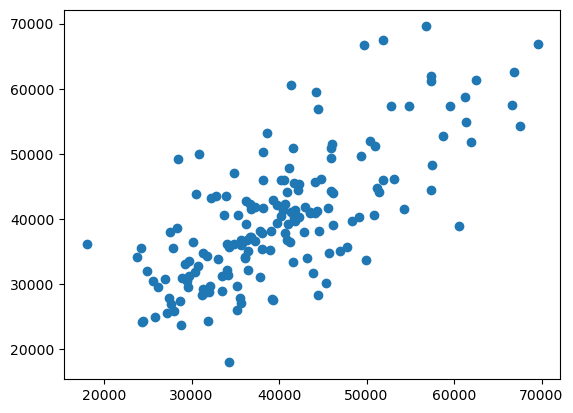

In [111]:
plt.scatter(df_envi_inter["Envi"], df_envi_inter["y"])
plt.show()

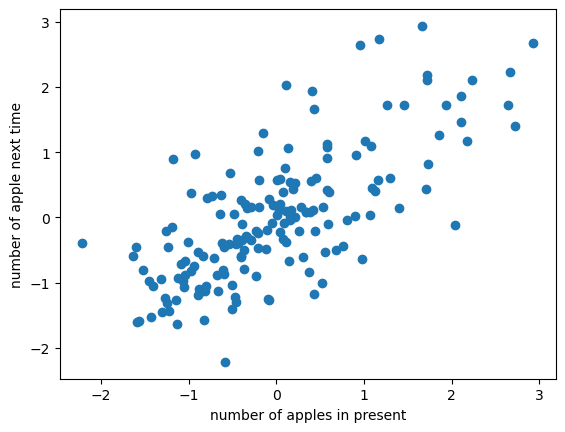

In [112]:
x = np.array(df_envi_inter["Envi"])
y = np.array(df_envi_inter["y"])

scaler = StandardScaler()
scaler.fit(x.reshape(-1, 1))
x = scaler.transform(x.reshape(-1, 1))
scaler.fit(y.reshape(-1, 1))
y = scaler.transform(y.reshape(-1, 1))
plt.scatter(x, y)
plt.xlabel("number of apples in present")
plt.ylabel("number of apple next time")
plt.show()

### ***Train Model Of Envi Apple***

In [113]:
def findBestRandomState(r, x, y):
    random = 0
    a = 100

    model = LinearRegression()
    for _ in range(r):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

        y_predict = model.predict(x_test.reshape(-1, 1))
        if (buff := mean_absolute_error(y_test, y_predict)) < a:
            a = buff
            random = _
        # print(f"The Mean Square Error: {mean_squared_error(y_test, y_predict)}")
        # print(f"The R2 score: {r2_score(y_test, y_predict)}")
    print(a, random)

# findBestRandomState(1000000,x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=257002)

#Seed 222431 with mean squerer error
#Seed 257002 with mean absolute error

model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [114]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print(cv_result.mean())

0.40378537338897524


### ***Predict from test_dataset Of Envi***

Mean Absolute Error: 0.2882404431809113
The Mean Square Error: 0.14055661242985176
The R2 score: 0.6902184885014049


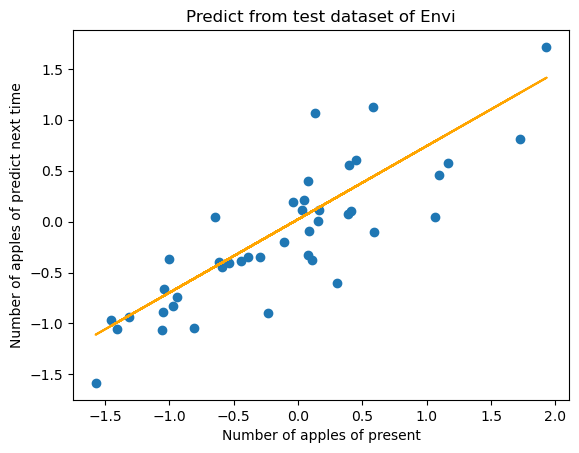

In [115]:
y_predict = model.predict(x_test.reshape(-1, 1))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(y_test, y_predict)}")
print(f"The R2 score: {r2_score(y_test, y_predict)}")

plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Envi")
plt.show()

---

In [116]:
df_fuji_inter = pd.read_csv("../../DataSet/Fuji/fuji_inter.csv")
df_fuji = pd.read_csv("../../DataSet/Fuji/fuji.csv")
df_fuji_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Fuji    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [117]:
df_fuji_inter = df_fuji_inter[df_fuji_inter["Fuji"] <= 10000]

In [118]:
df_fuji_inter["y"] = df_fuji_inter["Fuji"].shift(-1)
df_fuji_inter.dropna(inplace=True)
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    168 non-null    datetime64[ns]
 1   Envi    168 non-null    int64         
 2   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.2 KB


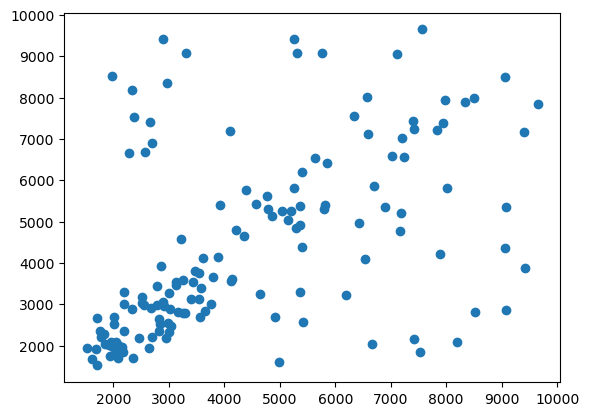

In [119]:
plt.scatter(df_fuji_inter["Fuji"], df_fuji_inter["y"])
plt.show()

In [120]:
feature_fuji = np.array(df_fuji_inter["Fuji"]).reshape(-1, 1)
label_fuji = np.array(df_fuji_inter["y"]).reshape(-1, 1)

scaler.fit(feature_fuji)
feature_fuji = scaler.transform(feature_fuji)
scaler.fit(label_fuji)
label_fuji = scaler.transform(label_fuji)

In [121]:
# findBestRandomState(1000000, feature_fuji, label_fuji)
# seed = 762701

In [122]:
feature_fuji_train, feature_fuji_test, label_fuji_train, label_fuji_test = train_test_split(feature_fuji, label_fuji, random_state=762701)
model.fit(feature_fuji_train, label_fuji_train)

LinearRegression()

Mean Absolute Error: 0.3501074019518754
The Mean Square Error: 0.20469971146049976
The R2 score: 0.6000132408839973


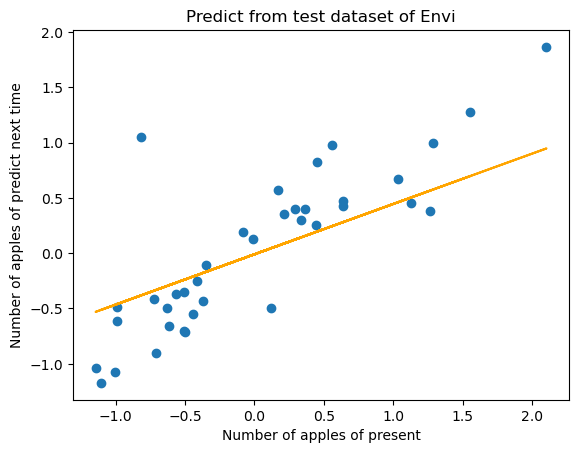

In [123]:
y_predict = model.predict(feature_fuji_test)
print(f"Mean Absolute Error: {mean_absolute_error(label_fuji_test, y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(label_fuji_test, y_predict)}")
print(f"The R2 score: {r2_score(label_fuji_test, y_predict)}")

plt.scatter(feature_fuji_test, label_fuji_test)
plt.plot(feature_fuji_test, y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Envi")
plt.show()